In [ ]:
# Import required modules.
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Check pandas version.
pd.__version__

'1.4.2'

## Q1. Downloading the data
We'll use the same NYC taxi dataset, but instead of "Green Taxi Trip Records", we'll use "Yellow Taxi Trip Records".  
Download the data for January and February 2023.  
Read the data for January. How many columns are there?

In [4]:
# Download the Yellow Taxi Trip Records for January and February 2023.
df_jan = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df_feb = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [5]:
# Find number of columns in df_jan.
col_nums = df_jan.shape[1]
print(f'Number of columns in data for January is: {col_nums}')

Number of columns in data for January is: 19


## Q2. Computing duration
Now let's compute the duration variable. It should contain the duration of a ride in minutes.  
What's the standard deviation of the trips duration in January?

In [6]:
# Show the head of the January dataframe.
df_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [7]:
# Create the duration column in the January dataframe.
df_jan['duration'] = df_jan['tpep_dropoff_datetime'] - df_jan['tpep_pickup_datetime']
df_jan['duration'] = [x.total_seconds() / 60 for x in df_jan['duration']]
df_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333


In [8]:
# Compute the standard deviation of the trips duration January.
df_jan_std = round(df_jan['duration'].std(), 2)
print(f'The standard deviation of the trips duration January is: {df_jan_std}')

The standard deviation of the trips duration January is: 42.59


## Q3. Dropping outliers
Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

In [9]:
# Show original number of rows in df_jan.
df_jan.shape[0]

3066766

In [10]:
# Remove outliers in df_jan.
df_jan = df_jan[(df_jan['duration'] >= 1) & (df_jan['duration'] <= 60)]

In [11]:
# Show final number of rows in df_jan.
df_jan.shape[0]

3009173

In [12]:
# Find fraction of records left.
rec_left = round(3009173 * 100 / 3066766)
print(f'The fraction of records left is: {rec_left}%')

The fraction of records left is: 98%


## Q4. One-hot encoding
Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

* Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)
* Fit a dictionary vectorizer
* Get a feature matrix from it

What's the dimensionality of this matrix (number of columns)?

In [13]:
# Select the the pickup and dropoff location IDs.
categorical = ['PULocationID', 'DOLocationID']
matrix_cat = df_jan[categorical].astype(str)

In [14]:
# Initiate encoder.
dv = DictVectorizer()

# Convert to dictionary
matrix_dicts = matrix_cat.to_dict(orient='records')

# Apply encoder.
matrix_trans = dv.fit_transform(matrix_dicts)

# Find number of columns in matrix.
matrix_col = matrix_trans.shape[1]
print(f'Number of columns of the matrix is: {matrix_col}')

Number of columns of the matrix is: 515


## Q5. Training a model
Now let's use the feature matrix from the previous step to train a model.

* Train a plain linear regression model with default parameters
* Calculate the RMSE of the model on the training data

What's the RMSE on train?

In [3]:
# define a function to process dataframes.

def process_dataframe(filename):
    
    df = pd.read_parquet(filename)

    df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
    df['duration'] = [x.total_seconds() / 60 for x in df['duration']]

    df = df[(df['duration'] >= 1) & (df['duration'] <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [4]:
# Process training and validation dataframes.
df_train = process_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df_val = process_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [5]:
# Show length of df_train and df_val.
len(df_train), len(df_val)

(3009173, 2855951)

In [6]:
# Define categorical columns.
from sklearn.feature_extraction import DictVectorizer
categorical = ['PULocationID', 'DOLocationID']
dv = DictVectorizer()

In [7]:
# Define X_train.
train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

In [8]:
# Define X_val.
val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [9]:
# Define y_train and y_val.
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [10]:
# Train a LinearRegression model.
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
# Calculate the RMSE of the model on the training data.
y_pred_train = lr.predict(X_train)
RMSE_train = round(mean_squared_error(y_train, y_pred_train, squared=False), 2)
print(f'The RMSE of the model on the training data is: {RMSE_train}')

The RMSE of the model on the training data is: 7.65


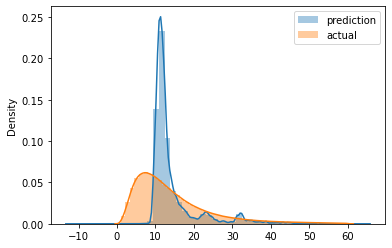

In [12]:
# Plot y_pred_val vs y_val.
sns.distplot(y_pred_train, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()
plt.show()

## Q6. Evaluating the model
Now let's apply this model to the validation dataset (February 2023).

What's the RMSE on validation?

In [13]:
# Calculate the RMSE of the model on the validation data.
y_pred_val = lr.predict(X_val)
RMSE_val = round(mean_squared_error(y_val, y_pred_val, squared=False), 2)
print(f'The RMSE of the model on the validation data is: {RMSE_val}')

The RMSE of the model on the validation data is: 7.81


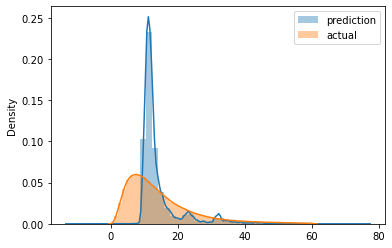

In [14]:
# Plot y_pred_val vs y_val.
sns.distplot(y_pred_val, label='prediction')
sns.distplot(y_val, label='actual')

plt.legend()
plt.show()